In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('transformed_data.csv')

In [73]:
df.describe()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,216400.000000,216400.000000,216400.000000,216400.000000,216400.000000,216400.000000,216400.000000,2.164000e+05,216400.000000,216400.000000
mean,0.535670,42.807315,10.403614,1.132052,1.048997,44.285522,0.332916,1.115086e+06,0.376774,0.153942
std,0.498727,14.850996,9.008064,0.832000,0.774418,31.235351,0.471258,8.500172e+05,0.484579,0.360894
min,0.000000,23.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.079000e+04,0.000000,0.000000
25%,0.000000,29.000000,3.000000,0.000000,0.000000,20.000000,0.000000,5.958438e+05,0.000000,0.000000
50%,1.000000,41.000000,7.000000,1.000000,1.000000,31.000000,0.000000,8.805390e+05,0.000000,0.000000
75%,1.000000,53.000000,15.000000,2.000000,2.000000,67.000000,1.000000,1.346543e+06,1.000000,0.000000
max,1.000000,85.000000,34.000000,3.000000,3.000000,135.000000,1.000000,1.035201e+07,1.000000,1.000000


In [74]:
from imblearn.under_sampling import RandomUnderSampler

X = df[['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]
y = df['Is_Lead']

rus = RandomUnderSampler(sampling_strategy='majority', random_state=666)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Random Forest

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=666)

In [76]:
print('Original class distribution: ', y.value_counts())
print('Balanced class distribution: ', y_balanced.value_counts())

Original class distribution: Is_Lead
0    183087
1     33313
Name: count, dtype: int64
Balanced class distribution: Is_Lead
0    33313
1    33313
Name: count, dtype: int64


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=666)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=666)

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Accuracy:  0.7204322593556134
Precision:  0.7305529024726732
Recall:  0.6930433907178093
F1:  0.7113039884273611
Confusion Matrix: 
 [[7516 2539]
 [3049 6884]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73     10055
           1       0.73      0.69      0.71      9933

    accuracy                           0.72     19988
   macro avg       0.72      0.72      0.72     19988
weighted avg       0.72      0.72      0.72     19988



In [79]:
mean_decrease_accuracy = rfc.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")

gini_importance = rfc.feature_importances_ * rfc.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[0.0213927  0.18907764 0.13354063 0.02974843 0.03055234 0.18607601
 0.13208764 0.2568873  0.02063731]

Mean Decrease GINI= [0.01069634 0.09453868 0.06677022 0.0148742  0.01527615 0.09303787
 0.06604372 0.12844347 0.01031864]


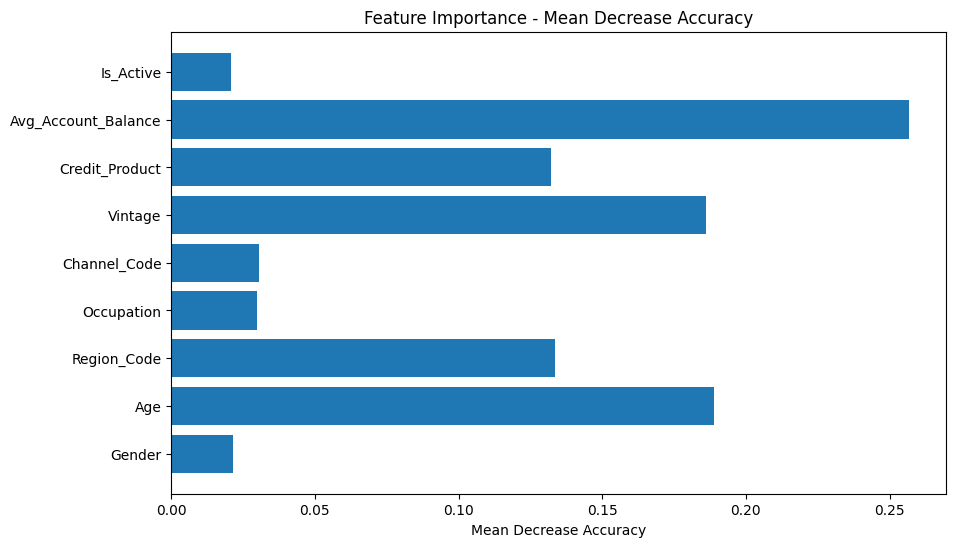

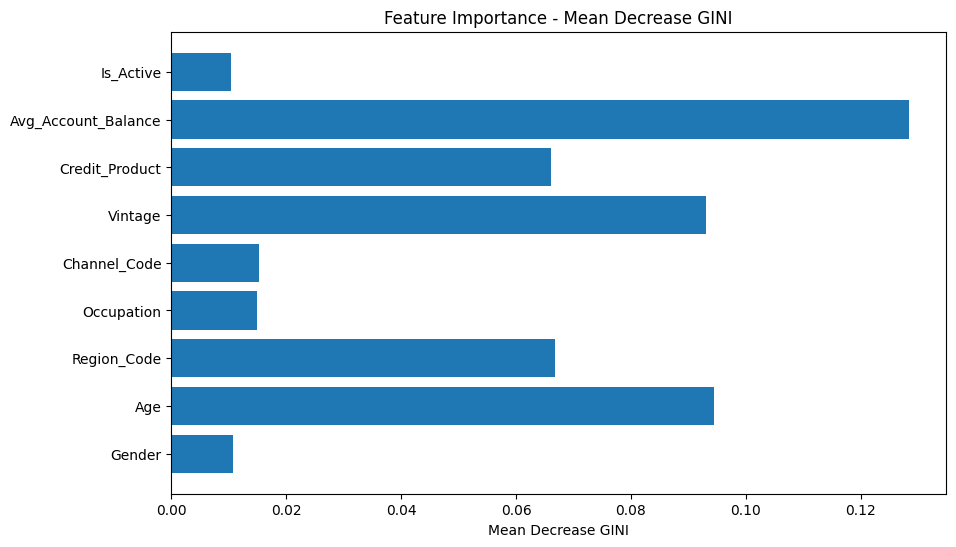

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), X.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), X.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [81]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

Avg_Account_Balance    0.256887
Age                    0.189078
Vintage                0.186076
Region_Code            0.133541
Credit_Product         0.132088
Channel_Code           0.030552
Occupation             0.029748
Gender                 0.021393
Is_Active              0.020637
dtype: float64


### Based on this, we consider dropping two features: Gender & Is_Active

In [82]:
X_short = df[['Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance']]


X_bal, y_bal = rus.fit_resample(X_short, y)
X_train_short, X_test_short, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=666)

rfc.fit(X_train_short,y_train)

y_pred_short = rfc.predict(X_test_short)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Accuracy:  0.7204322593556134
Precision:  0.7305529024726732
Recall:  0.6930433907178093
F1:  0.7113039884273611
Confusion Matrix: 
 [[7516 2539]
 [3049 6884]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73     10055
           1       0.73      0.69      0.71      9933

    accuracy                           0.72     19988
   macro avg       0.72      0.72      0.72     19988
weighted avg       0.72      0.72      0.72     19988



#### Since there is no significant change we keep the features

# KNN

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

k_values = range(1, 21)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=666)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    accuracies.append(np.mean(scores))


In [113]:
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=666)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Accuracy:  0.7117270362217331
Precision:  0.7182626896912612
Recall:  0.6909292258129467
F1:  0.7043308702791461
Confusion Matrix: 
 [[7363 2692]
 [3070 6863]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10055
           1       0.72      0.69      0.70      9933

    accuracy                           0.71     19988
   macro avg       0.71      0.71      0.71     19988
weighted avg       0.71      0.71      0.71     19988



# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtc = DecisionTreeClassifier(random_state=666)

grid_search = GridSearchCV(dtc, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Optimal Parameters: ", grid_search.best_params_)

opt = grid_search.best_estimator_
opt.fit(X_train, y_train)
y_pred = opt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Optimal Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:  0.7378427056233741
Precision:  0.7335058214747736
Recall:  0.7420718816067653
F1:  0.7377639875888299
Confusion Matrix: 
 [[7377 2678]
 [2562 7371]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74     10055
           1       0.73      0.74      0.74      9933

    accuracy                           0.74     19988
   macro avg       0.74      0.74      0.74     19988
weighted avg       0.74      0.74      0.74     19988



# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=666)

parameters = {
    'penalty': ['l1', 'l2'],  # Regularization norm
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Strength of regularization
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(lr, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Optimal Parameters: ", grid_search.best_params_)

opt = grid_search.best_estimator_
opt.fit(X_train, y_train)
y_pred = opt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shudeo/m

Optimal Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.6987692615569342
Precision:  0.6906432748538012
Recall:  0.7133796436122017
F1:  0.7018273659188828
Confusion Matrix: 
 [[6881 3174]
 [2847 7086]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.68      0.70     10055
           1       0.69      0.71      0.70      9933

    accuracy                           0.70     19988
   macro avg       0.70      0.70      0.70     19988
weighted avg       0.70      0.70      0.70     19988



/Users/shudeo/miniconda/envs/kddm/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=666)
grid_search = GridSearchCV(gnb, parameters, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Optimal Parameters: ", grid_search.best_params_)

opt = grid_search.best_estimator_
opt.fit(X_train_scaled, y_train)
y_pred = opt.predict(X_test_scaled)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))


Optimal Parameters:  {'var_smoothing': 1e-09}
Accuracy:  0.709925955573344
Precision:  0.7029945999018163
Recall:  0.7208295580388604
F1:  0.7118003777711501
Confusion Matrix: 
 [[7030 3025]
 [2773 7160]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71     10055
           1       0.70      0.72      0.71      9933

    accuracy                           0.71     19988
   macro avg       0.71      0.71      0.71     19988
weighted avg       0.71      0.71      0.71     19988



# XGBoost

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=666)

parameters = {
    'learning_rate': [0.01, 0.1, 0.2],    # Learning Rate
    'n_estimators': [50, 100, 200],       # Number of rounds
    'max_depth': [3, 5, 7],               # Maximum depth
    'subsample': [0.8, 1.0],              # Sample Size
    'colsample_bytree': [0.8, 1.0],       # Feature Size
}

grid_search = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Optimal Parameters: ", grid_search.best_params_)

opt = grid_search.best_estimator_
opt.fit(X_train, y_train)
y_pred = opt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Optimal Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Accuracy:  0.7415449269561737
Precision:  0.7521421770866391
Recall:  0.7157958320749018
F1:  0.7335190343546889
Confusion Matrix: 
 [[7712 2343]
 [2823 7110]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     10055
           1       0.75      0.72      0.73      9933

    accuracy                           0.74     19988
   macro avg       0.74      0.74      0.74     19988
weighted avg       0.74      0.74      0.74     19988



# AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=666)
parameters = {
    'n_estimators': [50, 100, 200],    # Number of weak hypotheses
    'learning_rate': [0.01, 0.1, 0.2],  # Contribution of weak hypotheses
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm
}

grid_search = GridSearchCV(ada, parameters, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Optimal Parameters: ", grid_search.best_params_)
opt = grid_search.best_estimator_
opt.fit(X_train, y_train)
y_pred = opt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Optimal Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 200}
Accuracy:  0.723884330598359
Precision:  0.7124975929135374
Recall:  0.7449914426658613
F1:  0.7283823022786554
Confusion Matrix: 
 [[7069 2986]
 [2533 7400]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72     10055
           1       0.71      0.74      0.73      9933

    accuracy                           0.72     19988
   macro avg       0.72      0.72      0.72     19988
weighted avg       0.72      0.72      0.72     19988

